In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZL1FPZ5KWA67VOUO9Pzx")
project = rf.workspace().project("test-2-g3mkp")
model = project.version(18).model

loading Roboflow workspace...
loading Roboflow project...


In [22]:
print(model)

{
  "id": "test-2-g3mkp/18",
  "name": "Test 2",
  "version": "18",
  "classes": null,
  "overlap": 30,
  "confidence": 40,
  "stroke": 1,
  "labels": false,
  "format": "json",
  "base_url": "https://detect.roboflow.com/"
}


In [23]:
import torch

In [24]:
torch.save(model.state_dict(), 'cars_detect.pt')

AttributeError: 'ObjectDetectionModel' object has no attribute 'state_dict'

In [3]:
data = model.predict("test_image.png", confidence=40, overlap=30).json()
print(data)

{'predictions': [{'x': 272.5, 'y': 407.0, 'width': 121.0, 'height': 88.0, 'confidence': 0.9148687124252319, 'class': 'invalid', 'class_id': 2, 'image_path': 'test_image.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 734.5, 'y': 506.5, 'width': 131.0, 'height': 71.0, 'confidence': 0.9014192223548889, 'class': 'invalid', 'class_id': 2, 'image_path': 'test_image.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 412.0, 'y': 287.5, 'width': 90.0, 'height': 59.0, 'confidence': 0.9009796977043152, 'class': 'invalid', 'class_id': 2, 'image_path': 'test_image.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 549.0, 'y': 413.0, 'width': 142.0, 'height': 112.0, 'confidence': 0.8993933200836182, 'class': 'invalid', 'class_id': 2, 'image_path': 'test_image.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 279.5, 'y': 235.5, 'width': 77.0, 'height': 53.0, 'confidence': 0.8938019275665283, 'class': 'Vehicle', 'class_id': 1, 'image_path': 'test_image.png', 'prediction_type':

In [6]:
vehicle = 0
invalid = 0
for k in data['predictions']:
    if k['class'] == 'Vehicle':
        vehicle+=1
    elif k['class'] == 'invalid':
        invalid+=1
print(vehicle)
print(invalid)

10
18


Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.21.0`. Use `Detections.from_inference` instead.


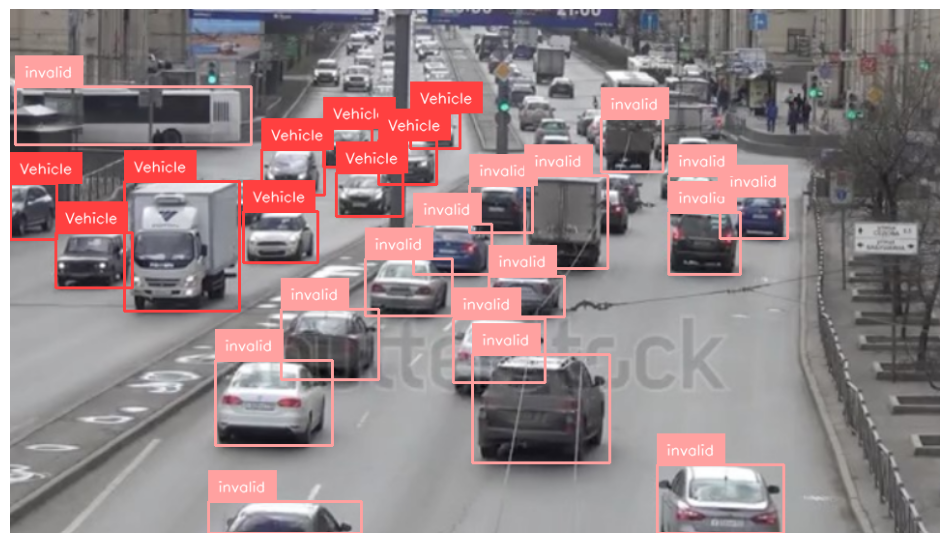

In [5]:
# import a utility function for loading Roboflow models
from inference import get_roboflow_model
# import supervision to visualize our results
import supervision as sv
# import cv2 to helo load our image
import cv2

# define the image url to use for inference
image_file = "test_image.png"
image = cv2.imread(image_file)


# load a pre-trained yolov8n model
model = get_roboflow_model(model_id="test-2-g3mkp/18")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)

# load the results into the supervision Detections api
detections = sv.Detections.from_roboflow(results[0].dict(by_alias=True, exclude_none=True))

# create supervision annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)


In [10]:
aa = cv2.imwrite("annnot.jpg", annotated_image)
print(aa)

True


In [5]:
import io, base64
from PIL import Image

# Assuming base64_str is the string value without 'data:image/jpeg;base64,'
img = Image.open(io.BytesIO(base64.decodebytes(bytes(img_data, "utf-8"))))
img.save('my-image.png')

In [3]:
!nvidia-smi

Sat Jan 27 00:32:39 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.41       Driver Version: 527.41       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P8     1W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import torch; torch.cuda.is_available()

True

In [6]:
!where nvcc

C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.0\bin\nvcc.exe


In [7]:
import onnxruntime as ort; print(ort.get_device())

GPU


In [8]:
!pip show onnxruntime-gpu

Name: onnxruntime-gpu
Version: 1.15.1
Summary: ONNX Runtime is a runtime accelerator for Machine Learning models
Home-page: https://onnxruntime.ai
Author: Microsoft Corporation
Author-email: onnxruntime@microsoft.com
License: MIT License
Location: c:\program files\python310\lib\site-packages
Requires: coloredlogs, flatbuffers, numpy, packaging, protobuf, sympy
Required-by: inference-gpu


In [9]:
!pip install inference

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/200.9 kB ? eta -:--:--
   ------ --------------------------------- 30.7/200.9 kB ? eta -:--:--
   ------ --------------------------------- 30.7/200.9 kB ? eta -:--:--
   ----------------- --------------------- 92.2/200.9 kB 655.4 kB/s eta 0:00:01
   --------------------- ---------------- 112.6/200.9 kB 726.2 kB/s eta 0:00:01
   ----------------------- -------------- 122.9/200.9 kB 599.1 kB/s eta 0:00:01
   -------------------------------------- 200.9/200.9 kB 762.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
    --------------------------------------- 0.1/6.7 MB 2.6 MB/s eta 0:00:03
    --------------------------------------- 0.1/6.7 MB 2.6 MB/s eta 0:00:03
   - -------------------------------------- 0.2/6.7 MB 2.0 MB/s 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import the InferencePipeline object
from inference import InferencePipeline
# Import the built in render_boxes sink for visualizing results
from inference.core.interfaces.stream.sinks import render_boxes

# initialize a pipeline object
pipeline = InferencePipeline.init(
    model_id="test-2-g3mkp/18", # Roboflow model to use
    video_reference=0, # Path to video, device id (int, usually 0 for built in webcams), or RTSP stream url
    on_prediction=render_boxes, # Function to run after each prediction
)
pipeline.start()
pipeline.join()


[01/27/24 12:28:38] ERROR    HTTP error encountered while requesting Roboflow API response: 404  ]8;id=823519;file://C:\Users\addym\AppData\Roaming\Python\Python310\site-packages\inference\core\roboflow_api.py\roboflow_api.py]8;;\:]8;id=130494;file://C:\Users\addym\AppData\Roaming\Python\Python310\site-packages\inference\core\roboflow_api.py#84\84]8;;\
                             Client Error: Not Found for url:                                                      
                             https://api.roboflow.com/aditya-dutta-47o3t/test-2-g3mkp/active_lea                   
                             rning?api_key=ZL***zx                                                                 

KeyboardInterrupt: 

In [6]:
import cv2

# Try different references starting from 0
for i in range(4):
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"Camera found at reference {i}")
        break
    cap.release()


Camera found at reference 0


In [7]:
cap.release()

In [20]:
from inference import InferencePipeline
# Import the built-in render_boxes sink for visualizing results
from inference.core.interfaces.stream.sinks import render_boxes

# Initialize a pipeline object with the built-in webcam (video_reference=0)
pipeline = InferencePipeline.init(
    model_id="test-2-g3mkp/18",  # Roboflow model to use
    video_reference=0,  # Use the built-in webcam
    on_prediction=render_boxes,  # Function to run after each prediction
)
pipeline.start()
pipeline.join()

EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:636 onnxruntime::python::CreateExecutionProviderInstance CUDA_PATH is set but CUDA wasn't able to be loaded. Please install the correct version of CUDA and cuDNN as mentioned in the GPU requirements page (https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirements), make sure they're in the PATH, and that your GPU is supported.
 when using ['CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.


ModelArtefactError: Unable to load ONNX session. Cause: D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:636 onnxruntime::python::CreateExecutionProviderInstance CUDA_PATH is set but CUDA wasn't able to be loaded. Please install the correct version of CUDA and cuDNN as mentioned in the GPU requirements page (https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirements), make sure they're in the PATH, and that your GPU is supported.


In [19]:
!pip install --upgrade onnxruntime

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.4 MB 435.7 kB/s eta 0:00:17
   ---------------------------------------- 0.0/7.4 MB 279.3 kB/s eta 0:00:27
   ---------------------------------------- 0.1/7.4 MB 326.1 kB/s eta 0:00:23
   ---------------------------------------- 0.1/7.4 MB 326.1 kB/s eta 0:00:23
    --------------------------------------- 0.1/7.4 MB 348.6 kB/s eta 0:00:21
    --------------------------------------- 0.1/7.4 MB 379.3 kB/s eta 0:00:20
    --------------------------------------- 0.1/7.4 MB 379.3 kB/s eta 0:00:20
    --------------------------------------- 0.1/7.4 MB 379.3 kB/s eta 0:00:20
   - -------------------------------------- 0.2/7.4 MB 452.9 kB/s eta 0:00:16
   - -------------------------------------- 0.2/7.4 MB 452.9 kB/s eta 0:00:16
   -

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference 0.9.8 requires onnxruntime<=1.15.1, but you have onnxruntime 1.16.3 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from inference import get_roboflow_model
model = get_roboflow_model(model_id="test-2-g3mkp/18",api_key="ZL1FPZ5KWA67VOUO9Pzx")

C:\Users\addym\AppData\Roaming\Python\Python310\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [21]:
import torch
import numpy as np
import cv2
import pafy
import time
from roboflow import Roboflow


class ObjectDetection:
    #Yolov5 model using open cv
    
    def __init__(self):
        self.model = self.load_model()
        self.classes = ['Vehicle','invalid']
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print("\n\nDevice Used:",self.device)
    
    def load_model(self):
        #loading a pretrained model
        rf = Roboflow(api_key="ZL1FPZ5KWA67VOUO9Pzx")
        project = rf.workspace().project("test-2-g3mkp")
        model = project.version(18).model
        return model
    def score_frame(self,frame):
        #Making a frame
        self.model.to(self.device)
        frame = [frame]
        results = self.model(frame)
        labels,cord = results.xyxyn[0][:,-1],results.xyxyn[0][:,:-1]
        return labels,cord
    def class_to_label(self,x):
        return self.classes[int(x)]
    
    def plot_boxes(self,results,frame):
        #Plotting box around image
        labels,cord = results
        n = len(labels)
        x_shape,y_shape = frame.shape[1], frame.shape[0]
        for i in range(n):
            row = cord[i]
            if row[4] >=0.2:
                x1,y1,x2,y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape)
                bgr = (0,255,0)
                cv2.rectangle(frame,(x1,y1),(x2,y2),bgr,2)
                cv2.putText(frame,self.class_to_label(labels[i]),(x1,y1), cv2.FONT_HERSHEY_SIMPLEX,0.9,bgr,2)
        return frame
    
    def __call__(self):
        cap = cv2.VideoCapture(0)
        while cap.isOpened():
            start_time = time.perf_counter()
            ret,frame = cap.read()
            if not ret:
                break
            results = self.score_frame(frame)
            frame = self.plot_boxes(results,frame)
            end_time = time.perf_counter()
            fps = 1/np.round(end_time-start_time,3)
            cv2.putText(frame,f'FPS: {int(fps)}',(20,70),cv2.FONT_HERSHEY_SIMPLEX,1.5,(255,0,0),3)
            cv2.imshow('img',frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

#Create a new object and execute
detection = ObjectDetection()
detection()

loading Roboflow workspace...
loading Roboflow project...


Device Used: cuda


AttributeError: 'ObjectDetectionModel' object has no attribute 'to'

In [2]:
rf = Roboflow(api_key="ZL1FPZ5KWA67VOUO9Pzx")
project = rf.workspace().project("test-2-g3mkp")
model = project.version(18).model

loading Roboflow workspace...
loading Roboflow project...


In [19]:
import cv2
model.webcam()

KeyboardInterrupt: 

In [16]:
!pip uninstall opencv-contrib-python
!pip uninstall opencv-contrib-python-headless

^C


In [ ]:
!pip install opencv-contrib-python
!pip install opencv-python